# Logistic Regression with `scikit-learn`

In this notebook, we will introduce how to use the Python package `scikit-learn` to perform a classification task with the logistic regression.

In [1]:
import warnings
import numpy as np
import pandas as pd
from helper import display_data # This function help us to display the first 5 data points
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns # seaborn will beautify our plots from matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_context('notebook')
sns.set_style('dark')

# This is used for ignoring a harmless warning from the *scipy* package
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
display_data(data)

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [3]:
# pandas can give us a better visualization on tabular data.
df = pd.DataFrame(data, columns=['Test 1', 'Test 2', 'Result'])
df.head()

,Test 1,Test 2,Result
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


In [4]:
X = data[:,0:2]
display_data(X)

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [5]:
y = data[:,2]
display_data(y)

array([ 1.,  1.,  1.,  1.,  1.])

## Plot Data

In [6]:
def plotData(X, y, label_x, label_y, label_pos, label_neg):
    pos, neg = y == 1, y == 0
    plt.scatter(X[pos][:,0], X[pos][:,1], marker='+', c='k', s=50, linewidth=2, label=label_pos)
    plt.scatter(X[neg][:,0], X[neg][:,1], c='y', s=50, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend();

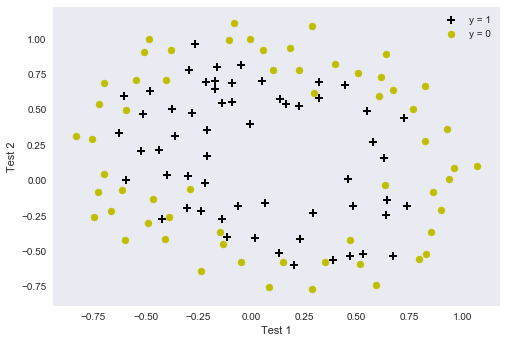

In [7]:
plotData(X, y, 'Test 1', 'Test 2', 'y = 1', 'y = 0')

From the plot above, we see that the data is not linearly separable. So let's try to apply the logistic regression directly to the original data.

In [8]:
lr = linear_model.LogisticRegression()

In [9]:
lr.fit(X, y)
lr.coef_

array([[-0.26556762, -0.01198618]])

In [10]:
h = .2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

score = lr.score(X, y)
score

0.5423728813559322

With an accuracy of 54.24%, we barely do better than random guessing... What happened?

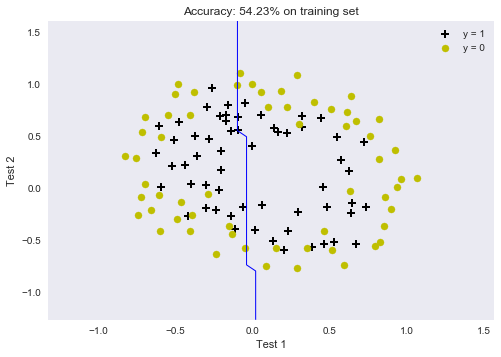

In [11]:
plt.contour(xx, yy, Z, [0.2], linewidths=1, colors='b');
plt.title('Accuracy: ' + str(score * 100)[:5] + "% on training set")
plotData(X, y, 'Test 1', 'Test 2', 'y = 1', 'y = 0')

## Preprocessing the Data

Obviously, such a simple logistic regression model is not sufficient to give a good result.

When we have only that many features, how could we add more features "artificially"? We use polynomials...

> Be aware that the number of features in the output array scales polynomially in the number of features of the input array, and exponentially in the degree. High degrees can cause overfitting.

In [12]:
poly = PolynomialFeatures(6)
poly_X = poly.fit_transform(X)
poly_X.shape

(118, 28)

In [13]:
lr = linear_model.LogisticRegression()

In [14]:
lr.fit(poly_X, y)
lr.coef_

array([[ 0.60181257,  0.61262932,  1.17369724, -1.94159987, -0.91652206,
        -1.34600069,  0.12538359, -0.3671774 , -0.35087379, -0.17439841,
        -1.43997026, -0.04973447, -0.6106624 , -0.27187562, -1.17708203,
        -0.24264323, -0.2065488 , -0.04393776, -0.27907087, -0.2909125 ,
        -0.46305003, -1.03941697,  0.02853522, -0.29251337,  0.01648987,
        -0.32818075, -0.14074991, -0.92845357]])

In [15]:
h = .2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = lr.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

score = lr.score(poly_X, y)
score

0.83050847457627119

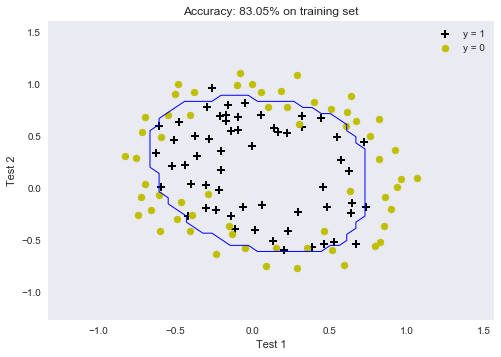

In [16]:
plt.contour(xx, yy, Z, [0.2], linewidths=1, colors='b');
plt.title('Accuracy: ' + str(score * 100)[:5] + "% on training set")
plotData(X, y, 'Test 1', 'Test 2', 'y = 1', 'y = 0')

By adding polynomial features, we now can achieving an 83.05% accuracy.